In [103]:
# "Data Mining" course Project
# Dimensionality reduction for Spotify music data

# Group 3:
# Athanasios Karampalis
# Reinis Sestakovskis
# Onur Yuksel

# 2022

##################################################

# PCA

In [104]:
# Install necessary packages

%pip install numpy
%pip install pandas
%pip install seaborn
%pip install sklearn
%matplotlib inline
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print("Cleaned up the log!")

Cleaned up the log!


In [105]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [106]:
from sklearn.preprocessing import OneHotEncoder

# One hot encoding categorical feature
def one_hot_enc(df,col_name):
    df = df.reset_index(drop=True)
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(encoder.fit_transform(df[[col_name]]).toarray())
    df = df.drop(col_name, axis=1)
    df_final = df.join(encoder_df)
    return df_final

In [107]:
def plotting(df):
    df['mult'] = (df['Feature 1']) * (df['Feature 2'])
    plt.scatter(df['Feature 1'],df['Feature 2'], c= df['mult'])
    plt.colorbar()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    df = df.drop('mult', axis=1)

In [108]:
from sklearn.neighbors import NearestNeighbors
def find_eps(df):
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(df)
    distances, indices = nbrs.kneighbors(df)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

In [109]:
def clustering(df, mode='dbscan', eps=10, min_samples=10):
    # Create and plot clusters
    # Number of centroids
    # Optimal number of clusters is 22, according to the Elbow method
    if mode == 'km':
        K = 12
        # Select random observation as a centroid
        km = KMeans(n_clusters=K, init='random', n_init=10, max_iter=300, tol=1e-02, random_state=0)
        prediction = km.fit_predict(df)
        df['cluster'] = km.labels_
    else:
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
        df['cluster'] = clustering.labels_
    return df

def clustering_plot(df):
    plt.figure(figsize=(16, 10))
    sns.scatterplot(
        x='Feature 1', y='Feature 2',
        hue='cluster',
        palette='gist_rainbow',
        # style='name',
        legend='full',
        data=df
    )
    plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)

In [110]:
# Reading the music data from CSV

df = pd.read_csv("data/dataset.csv")
print(len(df))
df = df.dropna()
print(len(df))
df.head()

16269
16268


,Unnamed: 0,id_x,track.artists,track.name,playlist_id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track.popularity
0,0,6YIivt0G3ZUuNrM62jp9pL,AJR,Way Less Sad,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.695,0.541,2,-8.350,1,0.0460,0.00707,0.000000,0.1040,0.409,140.018,207600,4,63.0
1,4,4MTmAFWHpvB9kPMSRgLFRp,The Lumineers,WHERE WE ARE,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.573,0.507,11,-8.084,1,0.0342,0.75900,0.000001,0.3770,0.363,123.183,172800,4,64.0
2,8,6y6xhAgZjvxy5kR5rigpY3,"Alesso, Marshmello, James Bay",Chasing Stars (feat. James Bay),37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.594,0.640,10,-6.865,1,0.0330,0.01690,0.000000,0.1350,0.492,92.871,170457,4,72.0
3,12,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain't Worried,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,148486,4,96.0
4,18,3o9kpgkIcffx0iSwxhuNI2,Em Beihold,Numb Little Bug,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.742,0.527,8,-6.892,0,0.0769,0.32700,0.000000,0.2500,0.638,84.974,169238,4,79.0


In [111]:
#Feature Selection and Filtering

columns_to_select = [
    # "id_x",             # Track id
    # "track.artists",
    # "track.name",
    # "playlist_id",
    # "name",             # Playlist name
    # "track.popularity"
    # "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature"
]

# Filter the playlists if needed and drop duplicates
# df_filtered = df[df['name'].isin(playlists_to_select)]
df_filtered = df.drop_duplicates(subset=['id_x'])
df_filtered = df_filtered[columns_to_select]
df_filtered = df_filtered.reset_index(drop=True)

df_filtered.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.695,0.541,2,-8.350,1,0.0460,0.00707,0.000000,0.1040,0.409,140.018,4
1,0.573,0.507,11,-8.084,1,0.0342,0.75900,0.000001,0.3770,0.363,123.183,4
2,0.594,0.640,10,-6.865,1,0.0330,0.01690,0.000000,0.1350,0.492,92.871,4
3,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,4
4,0.742,0.527,8,-6.892,0,0.0769,0.32700,0.000000,0.2500,0.638,84.974,4


In [112]:
X = df_filtered
X_enc = one_hot_enc(df_filtered,'key')
X_no_key = X.drop('key', axis=1)

In [113]:
from sklearn.preprocessing import StandardScaler

# PCA

# Examples:
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

# Scale/standardize values
scaler = StandardScaler()

# Not encoded key, standardized
X_norm = scaler.fit_transform(X)

# Encoded key, standardized
X_enc_norm = scaler.fit_transform(X_enc)

# No key, standardized
X_no_key_norm = scaler.fit_transform(X_no_key)

# Perform PCA to 2 dimensions
pca = PCA(n_components=2)

# Not encoded, not standardized
pca_results = pca.fit_transform(X);

# Not encoded, standardized
pca_results_norm = pca.fit_transform(X_norm);

# Encoded, not standardized
pca_results_enc= pca.fit_transform(X_enc);

# Encoded, standardized
pca_results_enc_norm= pca.fit_transform(X_enc_norm);

# No key, not standardized
pca_results_no_key= pca.fit_transform(X_no_key);

# No key, standardized
pca_results_no_key_norm= pca.fit_transform(X_no_key_norm);

C:\Users\Reinis\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Reinis\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Reinis\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [114]:
#Plotting
lower_dim = pd.DataFrame(pca_results, columns=['Feature 1', 'Feature 2'])
lower_dim_norm = pd.DataFrame(pca_results_norm, columns=['Feature 1', 'Feature 2'])
lower_dim_enc = pd.DataFrame(pca_results_enc, columns=['Feature 1', 'Feature 2'])
lower_dim_enc_norm = pd.DataFrame(pca_results_enc_norm, columns=['Feature 1', 'Feature 2'])
lower_dim_no_key = pd.DataFrame(pca_results_no_key, columns=['Feature 1', 'Feature 2'])
lower_dim_no_key_norm = pd.DataFrame(pca_results_no_key_norm, columns=['Feature 1', 'Feature 2'])

#### Plot for not encoded, not standardized dataset

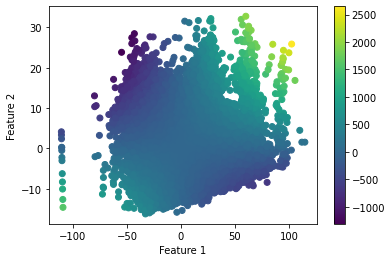

In [115]:
plotting(lower_dim)

#### Plot for not encoded, standardized dataset

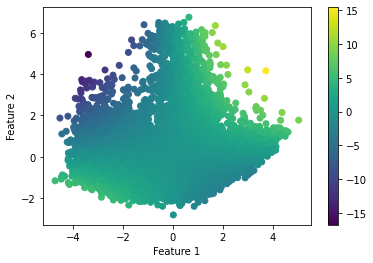

In [116]:
plotting(lower_dim_norm)

#### Plot for encoded, not standardized dataset


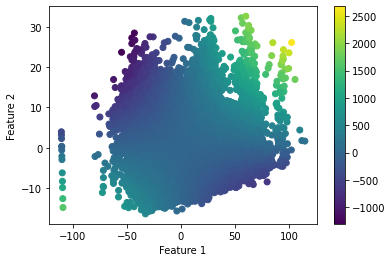

In [117]:
plotting(lower_dim_enc)

#### Plot for encoded, standardized dataset


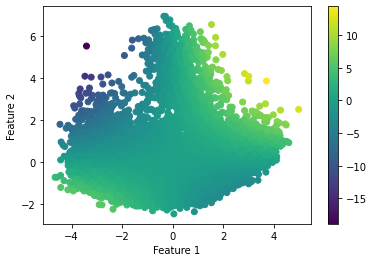

In [118]:
plotting(lower_dim_enc_norm)

#### Plot for no key, not standardized dataset


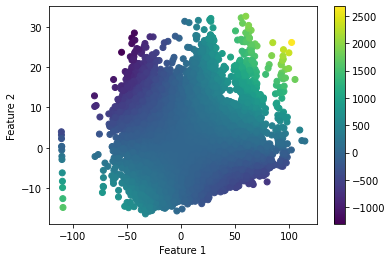

In [119]:
plotting(lower_dim_no_key)

#### Plot for no key, standardized dataset

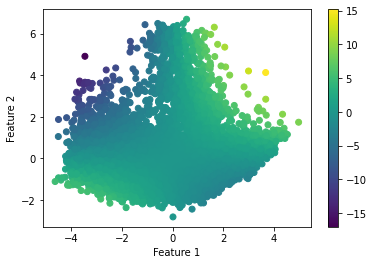

In [120]:
plotting(lower_dim_no_key_norm)

In [121]:
# Run trustworthiness

from sklearn.manifold import trustworthiness as trustworthiness
score = trustworthiness(lower_dim,X,n_neighbors=5, metric='euclidean')
score_norm = trustworthiness(lower_dim_norm,X_norm,n_neighbors=5, metric='euclidean')
score_enc = trustworthiness(lower_dim_enc,X_enc,n_neighbors=5, metric='euclidean')
score_enc_norm = trustworthiness(lower_dim_enc_norm,X_enc_norm,n_neighbors=5, metric='euclidean')
score_no_key = trustworthiness(lower_dim_no_key,X_no_key,n_neighbors=5, metric='euclidean')
score_no_key_norm = trustworthiness(lower_dim_no_key_norm,X_no_key_norm,n_neighbors=5, metric='euclidean')

print(f'Trustworthiness for not encoded, not standardized is :{score}')
print(f'Trustworthiness for not encoded, standardized is :{score_norm}')
print(f'Trustworthiness for encoded, not standardized is :{score_enc}')
print(f'Trustworthiness for encoded, standardized is :{score_enc_norm}')
print(f'Trustworthiness for no key, not standardized is :{score_no_key}')
print(f'Trustworthiness for no key, standardized is :{score_no_key_norm}')

C:\Users\Reinis\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Trustworthiness for not encoded, not standardized is :0.9842125120610893
Trustworthiness for not encoded, standardized is :0.9592965630949178
Trustworthiness for encoded, not standardized is :0.989936183570749
Trustworthiness for encoded, standardized is :0.9394517469797214
Trustworthiness for no key, not standardized is :0.9927393894842546
Trustworthiness for no key, standardized is :0.9691023339929711


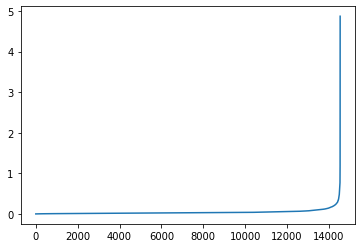

In [122]:
find_eps(lower_dim_enc_norm)

In [123]:
cluster_enc_norm = clustering(lower_dim_enc_norm,mode='km')

In [124]:
comparison = cluster_enc_norm.join(X['key'])

In [125]:
comparison

,Feature 1,Feature 2,mult,cluster,key
0,-2.233912,-0.291008,0.650087,4,2
1,-1.442527,0.553056,-0.797799,4,11
2,-2.209653,0.351784,-0.777320,4,10
3,-3.189022,-0.969931,3.093132,7,0
4,-2.460473,-0.155915,0.383626,4,8
...,...,...,...,...,...
14533,0.421249,-1.469451,-0.619004,1,0
14534,-0.533613,-1.276662,0.681244,9,9
14535,-0.092613,-1.009316,0.093476,1,8
14536,0.908806,-0.027994,-0.025441,1,6


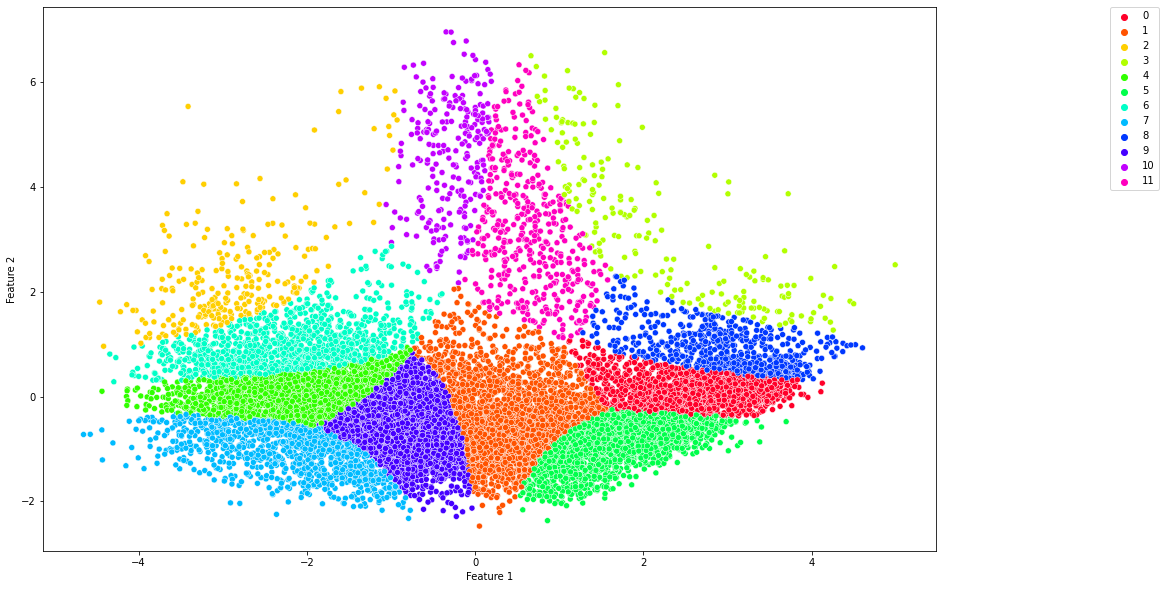

In [126]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='Feature 1', y='Feature 2',
    hue='cluster',
    palette='gist_rainbow',
    # style='name',
    legend='full',
    data=cluster_enc_norm
    )
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)